# Getting Started with ReproZip



In [23]:
!python -m pip install -U reprozip reprounzip graphviz

Requirement already up-to-date: reprozip in /srv/conda/envs/notebook/lib/python3.7/site-packages (1.0.16)
Requirement already up-to-date: reprounzip in /srv/conda/envs/notebook/lib/python3.7/site-packages (1.0.16)
Requirement already up-to-date: graphviz in /srv/conda/envs/notebook/lib/python3.7/site-packages (0.14.2)


First we set usage reporting, so the command output doesn't request it:

In [24]:
!reprozip usage_report --enable

Thank you, usage reports will be sent automatically from now on.


Then we change into the PDF folder, and trace the rendering of a PDF that has non-embedded fonts...

In [34]:
#input_file = 'test_fontArialNotEmbedded.pdf'
input_file = 'lorem-ipsum.pdf'

In [35]:
#%%bash
!rm -fr pdf/.reprozip-trace
!cd pdf && reprozip trace ./render-pdf.sh {input_file}

GPL Ghostscript 9.26 (2018-11-20)
Copyright (C) 2018 Artifex Software, Inc.  All rights reserved.
This software comes with NO WARRANTY: see the file PUBLIC for details.
Processing pages 1 through 2.
Page 1
Page 2
Configuration file written in .reprozip-trace/config.yml
Edit that file then run the packer -- use 'reprozip pack -h' for help


In [36]:
# Remove any earlier effort:
!rm -f pdf/{input_file}.rpz
# Generate the package:
!cd pdf && reprozip pack {input_file}.rpz

In [40]:
# Remove any earlier effort:
!rm -f pdf/{input_file}.dot pdf/{input_file}.json
# Generate the dependency graph:
!reprounzip graph pdf/{input_file}.dot pdf/{input_file}.rpz
# And again, but in a simpler JSON format:
!reprounzip graph --json pdf/{input_file}.json pdf/{input_file}.rpz

In [41]:
!ls -lct pdf/{input_file}*

-rw-r--r-- 1 andy andy    20122 Nov  2 23:29 pdf/lorem-ipsum.pdf.json
-rw-r--r-- 1 andy andy    20698 Nov  2 23:29 pdf/lorem-ipsum.pdf.dot
-rw-r--r-- 1 andy andy 11929600 Nov  2 23:26 pdf/lorem-ipsum.pdf.rpz
-rw-r--r-- 1 andy andy    10745 Nov  2 19:25 pdf/lorem-ipsum.pdf-002.png
-rw-r--r-- 1 andy andy    55870 Nov  2 19:25 pdf/lorem-ipsum.pdf-001.png
-rw-r--r-- 1 andy andy    21450 Nov  2 19:16 pdf/lorem-ipsum.pdf


/home/andy/pdf/lorem-ipsum.pdf.dot.svg

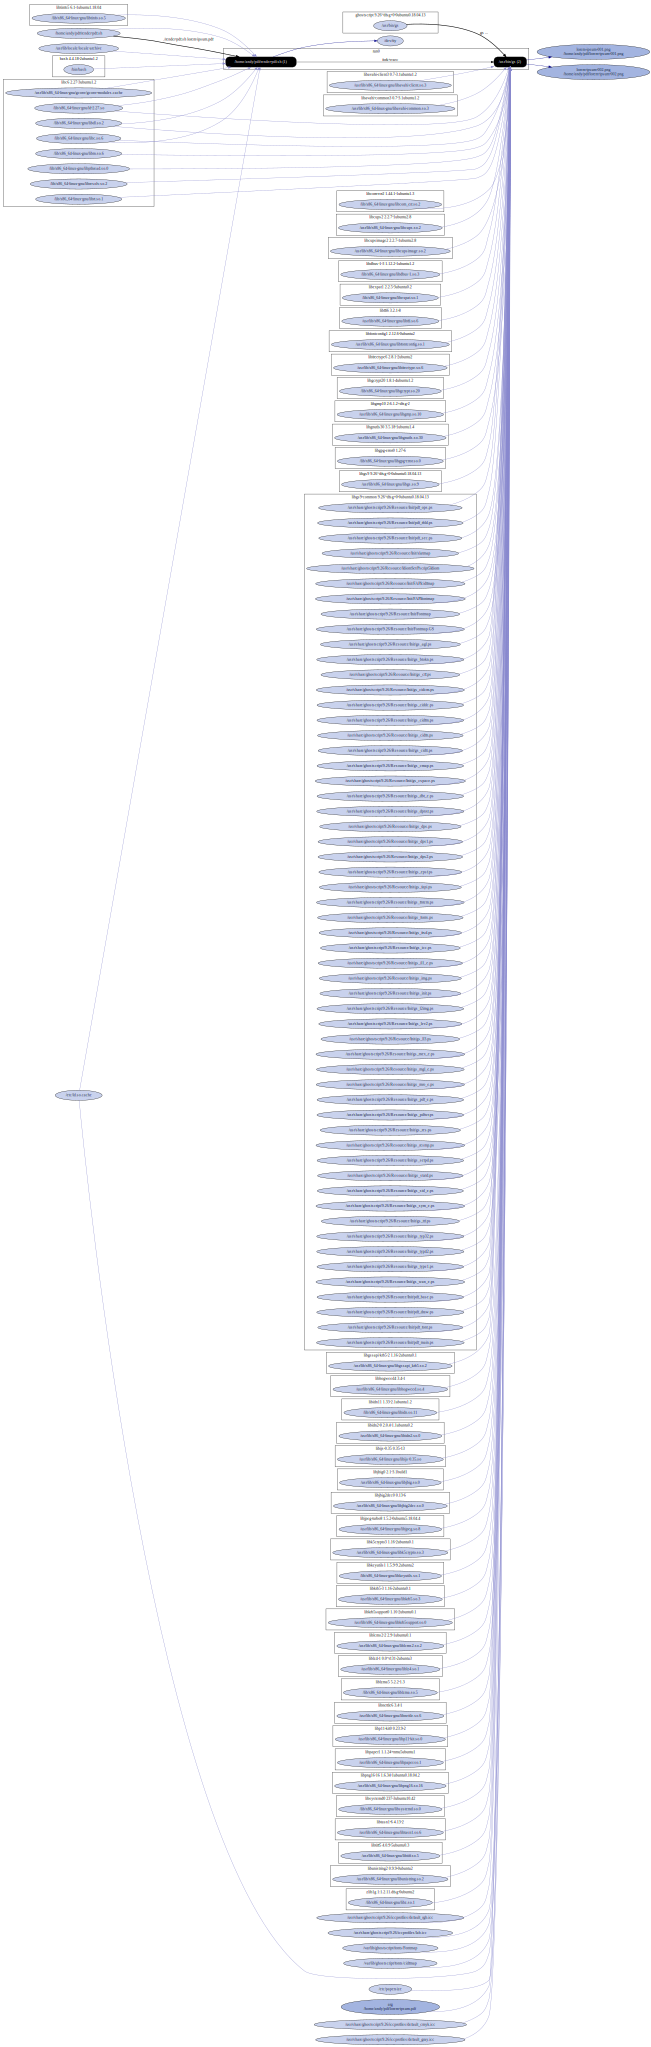

In [42]:
from graphviz import render

# Render to SVG:
dot_file = 'pdf/%s.dot' % input_file
render(engine='dot', filepath=dot_file, format='svg')
from IPython.display import SVG, HTML, FileLink, display

# Give a link to download the SVG:
svg_file = '%s.svg' % dot_file
display(FileLink(svg_file))
# Plot the SVG, but hack in a style to make it zoom out:
style = "<style>.output_svg div {width:100% !important;height:100% !important;</style>"
display(HTML(style))
display(SVG(filename=svg_file))